In [1]:
#importing dataset from @ https://finance.yahoo.com/quote/MSFT/history/
import pandas as pd

df = pd.read_csv(r"/MSFT.csv")

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060163,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062311,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063386,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061774,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060700,47894400
...,...,...,...,...,...,...,...
9592,2024-04-05,420.010010,426.510010,418.320007,425.519989,425.519989,16544300
9593,2024-04-08,425.170013,427.279999,423.299988,424.589996,424.589996,14272400
9594,2024-04-09,426.440002,427.739990,421.619995,426.279999,426.279999,12512300
9595,2024-04-10,422.190002,424.029999,419.700012,423.260010,423.260010,16216600


In [2]:
df = df[['Date', 'Close']]

df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9592,2024-04-05,425.519989
9593,2024-04-08,424.589996
9594,2024-04-09,426.279999
9595,2024-04-10,423.260010


In [3]:
df['Date']

0       1986-03-13
1       1986-03-14
2       1986-03-17
3       1986-03-18
4       1986-03-19
           ...    
9592    2024-04-05
9593    2024-04-08
9594    2024-04-09
9595    2024-04-10
9596    2024-04-11
Name: Date, Length: 9597, dtype: object

In [4]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [5]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

<ipython-input-5-f6fc52bb0fa5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0      1986-03-13
1      1986-03-14
2      1986-03-17
3      1986-03-18
4      1986-03-19
          ...    
9592   2024-04-05
9593   2024-04-08
9594   2024-04-09
9595   2024-04-10
9596   2024-04-11
Name: Date, Length: 9597, dtype: datetime64[ns]

In [6]:
df.index = df.pop('Date')
df

,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
...,...
2024-04-05,425.519989
2024-04-08,424.589996
2024-04-09,426.279999


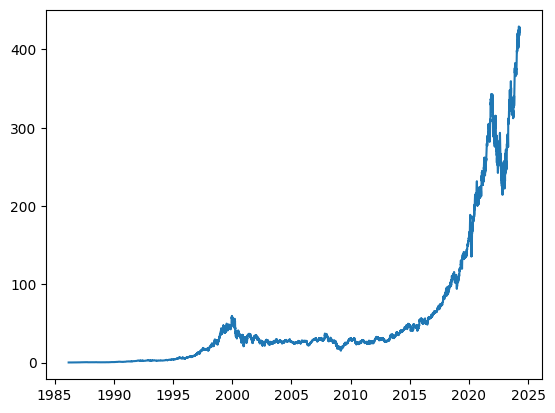

In [7]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [8]:
#For LSTM we need to convert this problem into a supervised learning problem.

In [9]:
import numpy as np

#Function Definition: taking 4 parameters within (), where n is the size of the window.
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):

  #Converting Date String to Datetime Objects:
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  #Initialization
  target_date = first_date

  #Creating empty list dates and X, Y
  dates = []
  X, Y = [], []

  last_time = False
  while True: #Looping through Dates
    df_subset = dataframe.loc[:target_date].tail(n+1) #Creating a subset of the DataFrame, containing the rows up to 'target_date' then takes the last n+1 rows

    #Error Handling
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    #Extracting Features and Target: It extracts the 'Close' prices from the DataFrame subset, then splits them into features 'x' (all but the last value) and target 'y' (the last value).
    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    #Handling Dates
    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    #Checking for last_date:
    if target_date == last_date:
      last_time = True

  #Creating a DataFrame for Return:
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  #Formatting Features:
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  #Adding Target Column
  ret_df['Target'] = Y

  #Returning the result
  return ret_df

# Start day second time around: '2023-04-12'
windowed_df = df_to_windowed_df(df,
                                '2023-04-12',
                                '2024-04-11',
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2023-04-12,291.600006,289.390015,282.829987,283.489990
1,2023-04-13,289.390015,282.829987,283.489990,289.839996
2,2023-04-14,282.829987,283.489990,289.839996,286.140015
3,2023-04-17,283.489990,289.839996,286.140015,288.799988
4,2023-04-18,289.839996,286.140015,288.799988,288.369995
...,...,...,...,...,...
247,2024-04-05,421.440002,420.450012,417.880005,425.519989
248,2024-04-08,420.450012,417.880005,425.519989,424.589996
249,2024-04-09,417.880005,425.519989,424.589996,426.279999
250,2024-04-10,425.519989,424.589996,426.279999,423.260010


In [10]:
def windowed_df_to_date_X_y(windowed_dataframe): #X - including target-3,-2,-1 as 3-D metrix
  df_as_np = windowed_dataframe.to_numpy() #Convert dataframe to numpy array

  dates = df_as_np[:, 0] #getting dates

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1)) #Univariate forecasting- just looking at the Closing value changing over time.

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((252,), (252, 3, 1), (252,))

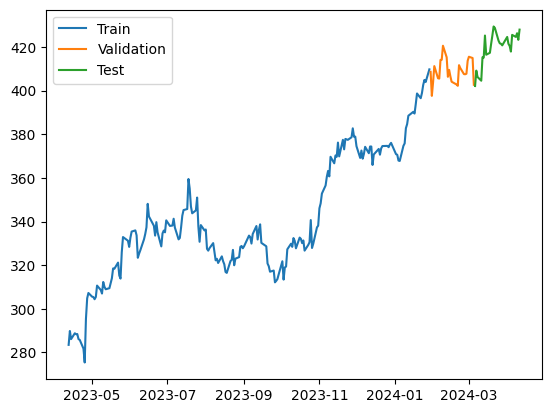

In [11]:
#Splitting the data into Train, Validation and Test partitions.
#Training - will train the model.
#Validation - will help train the model.
#Testing - Evaluate the performance of the model.
q_80 = int(len(dates) * .8) #integer of length of dates
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80] #training on first 80%.

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90] #Validating between 80 to 90% - 10%
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:] #Testing on last 10% from 90% onwards.

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

#

In [12]:
from tensorflow.keras.models import Sequential #Sequential model
from tensorflow.keras.optimizers import Adam #Optimizer we are going to use
from tensorflow.keras import layers #Model which is sequential and passed on to different layers.

model = Sequential([layers.Input((3, 1)), #specifying the shape of the input
                    layers.LSTM(64), #Arbitrary
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'), #Stacking Dense layers
                    layers.Dense(1)]) #Only forescasting 1 variable

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

#now ready to fit the model.
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100) #Epochs - 100 runs through the dataset.

Epoch 1/100
7/7 [==============================] - 10s 358ms/step - loss: 116048.0625 - mean_absolute_error: 339.5247 - val_loss: 166530.7969 - val_mean_absolute_error: 408.0482
Epoch 2/100
7/7 [==============================] - 0s 36ms/step - loss: 115684.8750 - mean_absolute_error: 338.9884 - val_loss: 166064.0156 - val_mean_absolute_error: 407.4759
Epoch 3/100
7/7 [==============================] - 0s 17ms/step - loss: 115270.9844 - mean_absolute_error: 338.3774 - val_loss: 165504.5469 - val_mean_absolute_error: 406.7888
Epoch 4/100
7/7 [==============================] - 0s 21ms/step - loss: 114743.5859 - mean_absolute_error: 337.5942 - val_loss: 164713.5938 - val_mean_absolute_error: 405.8154
Epoch 5/100
7/7 [==============================] - 0s 21ms/step - loss: 113921.7812 - mean_absolute_error: 336.3745 - val_loss: 163441.8438 - val_mean_absolute_error: 404.2455
Epoch 6/100
7/7 [==============================] - 0s 22ms/step - loss: 112814.7188 - mean_absolute_error: 334.7296 - 

7/7 [==============================] - 1s 3ms/step


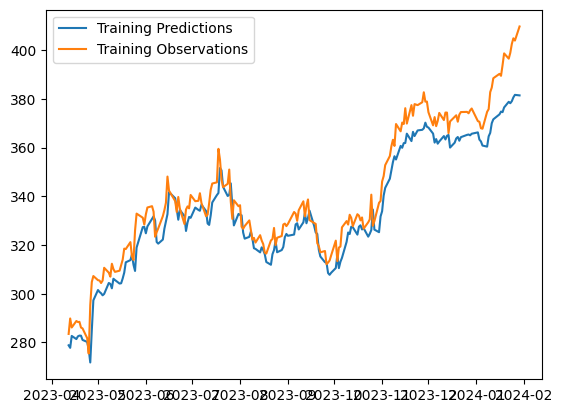

In [13]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions','Training Observations'])

1/1 [==============================] - 0s 24ms/step


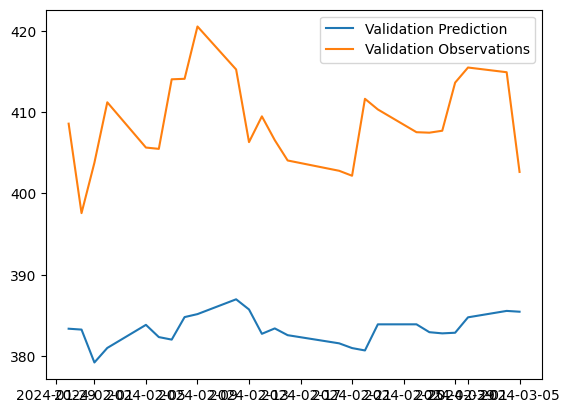

In [14]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Prediction', 'Validation Observations'])

1/1 [==============================] - 0s 24ms/step


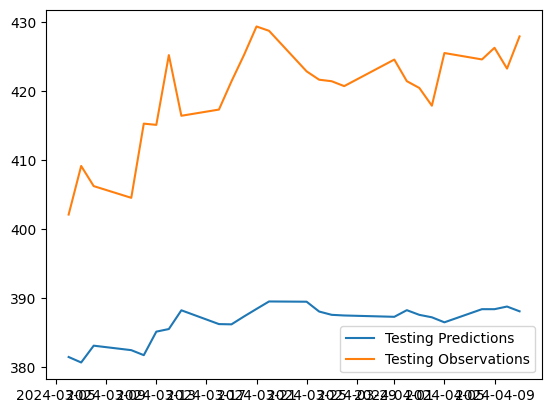

In [15]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions','Testing Observations'])

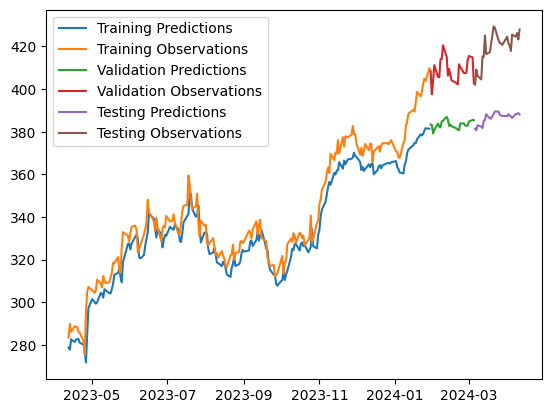

In [16]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [17]:
#Predicting long term

from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test]) #recursive predictiong will be through these following dates.

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 30ms/step


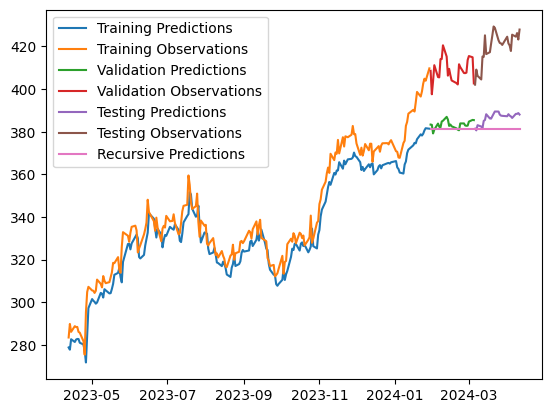

In [18]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])